<a href="https://colab.research.google.com/github/aryan-panja/ACE-GFG-ADOBE/blob/main/Case1GFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy
!pip install opencv-python-headless numpy matplotlib

# Step 3: Shape detection code
import cv2
import numpy as np
from matplotlib import pyplot as plt


Output image saved as output_labeled.png


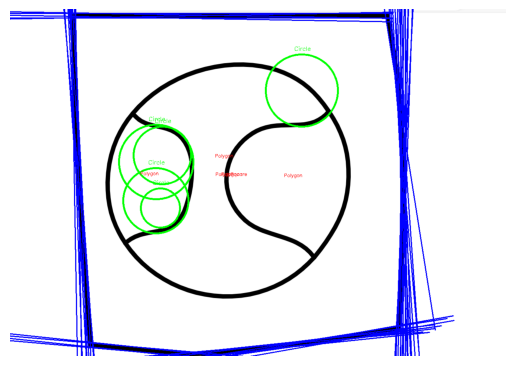

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shapes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                               param1=50, param2=30, minRadius=10, maxRadius=100)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)  # Draw the circle in green
            cv2.putText(image, "Circle", (x - 20, y - r - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw the line in blue
            cv2.putText(image, "Line", (x1 + 10, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Process contours to identify other shapes
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the number of vertices
        num_vertices = len(approx)

        # Identify shapes and label
        if num_vertices == 2:
            label = "Line"
        elif num_vertices == 3:
            label = "Triangle"
        elif num_vertices == 4:
            # It's a rectangle or square
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.9 <= aspect_ratio <= 1.1:
                label = "Square"
            else:
                label = "Rectangle"
        elif num_vertices == 5:
            label = "Star"
            # Optional: refine star detection if necessary (for example, by checking angles)
        elif num_vertices > 5:
            # Optional: check for polygons with more than 5 vertices
            label = "Polygon"
            # Optional: Check the convexity of the polygon to distinguish different types
        else:
            label = "Unknown"

        # Calculate centroid and draw the label with red color
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            font_scale = 0.4  # Smaller font scale
            font_thickness = 1  # Smaller font thickness
            color = (0, 0, 255)  # Red color in BGR format
            cv2.putText(image, label, (cX - 20, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, font_thickness)
        else:
            print("Warning: Zero contour area detected, skipping labeling.")

    # Save the output image
    output_path = 'output_labeled.png'
    cv2.imwrite(output_path, image)
    print(f"Output image saved as {output_path}")

    # Display the result
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Run shape detection
image_path = 'ball.png.png'  # Ensure this is the correct path to your image
detect_shapes(image_path)
